In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-03-BIGDATA/master/init.py
import init; init.init(force_download=False);
from IPython.display import Image

replicating local resources


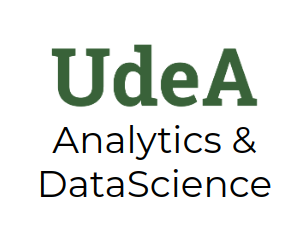

In [ ]:
Image("local/imgs/udea-datascience.png")

# **TALLER 2: DataFrame**
## Desarrollado por: Mg. Efraín Alberto Oviedo; Ing. Kevin Martínez Gallego
## Universidad de Antioquia

Por favor, ingrese la información de cada integrante del grupo de trabajo

**Nombre Completo:**

- Maria Isabel Duque Buitrago
- Cristhian Camilo Ocampo Bolivar
- Leidy Estefanía Silva Torres

**Cédula:**

- 1.037.666.575
- 1.152.220.729
- 1.020.479.068

**Correo Institucional:**

- maria.duqueb@udea.edu.co
- cristhian.ocampo@udea.edu.co
- estefania.silva@udea.edu.co

#**Análisis de becas académicas para estudiantes Colombianos**

El ICETEX ha dispuesto un histórico de becas ofrecidas para estudios de nivel de pregrado y posgrado, presenciales o virtuales, que han sido propuestas para fortalecer la formación académica de ciudadanos colombianos en el exterior.

(Disponible en https://www.datos.gov.co/Educaci-n/Icetex-Hist-rico-de-Becas/eb6r-dfgr)

Para cada caso se reportan los siguientes datos:

* Código Convocatoria
* Nombre del Oferente: Nombre del gobierno que ofrece la beca.
* Área del Conocimiento
* Nombre del Programa
* Nombre del País
* Fecha de Recepción -mm/dd/aaaa
* Perfil del Aplicante
* Objetivo del Programa: Breve descripción del programa académico.

Se solicita de su ayuda para responder a los siguientes interrogantes:

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
!tar xf spark-3.5.5-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3"

import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

In [ ]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)

/content/spark-3.5.5-bin-hadoop3/python/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
data = sqlCtx.read.option("header",True) \
     .csv("/content/local/data/icetex_becas.csv")
data.show(5)

+-------------------+--------------------+---------------------+--------------------+--------------------+------------------------------+--------------------+---------------------+
|Codigo Convocatoria| Nombre del Oferente|Area del Conocimiento| Nombre del programa|     Nombre del País|Fecha de Recepción -mm/dd/aaaa|Perfil del Aplicante|Objetivo del Programa|
+-------------------+--------------------+---------------------+--------------------+--------------------+------------------------------+--------------------+---------------------+
|          2127916.0|OEA - TOP - ARGEN...|       ADMINISTRACIÓN|POLÍTICAS DE GOBI...|PLATAFORMA DE EDU...|          05/27/2016 12:00:...|El programa está ...| a) Proporcionar a...|
|          3101616.0|ALIANZA DEL PACÍF...|     DIFERENTES AREAS|PLATAFORMA DE MOV...|Chile (República ...|                          NULL|El programa está ...| El objetivo del P...|
|          2221414.0|GOBIERNO DE LA INDIA|  INGENIERIA Y AFINES|DATA COMMUNICATIO...|India (Rep

##**A) Calidad de datos**

Revise cada una de las variables disponibles y resuelva los problemas de calidad de datos que puedan afectar el desarrollo de este taller, justificando las razones de su decisión para cada caso


Presente aquí el código desarrollado y el resultado obtenido

# **Análisis**

De manera preliminar, se realizó la identificación del tipo de dato correspondiente a cada variable. La columna de fecha fue transformada al formato Date, eliminando la información de la hora. Además, se identificaron y eliminaron los registros duplicados en la columna Código Convocatoria.

Se detectó que aproximadamente el 43% de los registros presentaban valores nulos en la columna de fecha. Estos registros fueron eliminados temporalmente con el objetivo de analizar si la cantidad de becas ofrecidas a colombianos ha aumentado a lo largo de los años. Sin embargo, para el resto del análisis, no se consideró necesario eliminar dichos valores nulos, ya que se cuenta con información completa en las demás columnas, las cuales son esenciales para obtener resultados más precisos y representativos.

In [ ]:
data.printSchema()

root
 |-- Codigo Convocatoria: string (nullable = true)
 |-- Nombre del Oferente: string (nullable = true)
 |-- Area del Conocimiento: string (nullable = true)
 |-- Nombre del programa: string (nullable = true)
 |-- Nombre del País: string (nullable = true)
 |-- Fecha de Recepción -mm/dd/aaaa: string (nullable = true)
 |-- Perfil del Aplicante: string (nullable = true)
 |-- Objetivo del Programa: string (nullable = true)



In [ ]:
from pyspark.sql.types import*
data = sqlCtx.read.format("csv") \
      .option("header", True) \
      .option("delimiter", ",") \
      .load("/content/local/data/icetex_becas.csv")

In [ ]:
from pyspark.sql.functions import to_timestamp, to_date
data = data.withColumnRenamed("Fecha de Recepción -mm/dd/aaaa", "fecha_recepcion")
data = data.withColumn(
    "fecha_recepcion",
    to_timestamp("fecha_recepcion", "MM/dd/yyyy hh:mm:ss a")
)
data = data.withColumn("fecha_recepcion", to_date("fecha_recepcion"))
data.printSchema()

root
 |-- Codigo Convocatoria: string (nullable = true)
 |-- Nombre del Oferente: string (nullable = true)
 |-- Area del Conocimiento: string (nullable = true)
 |-- Nombre del programa: string (nullable = true)
 |-- Nombre del País: string (nullable = true)
 |-- fecha_recepcion: date (nullable = true)
 |-- Perfil del Aplicante: string (nullable = true)
 |-- Objetivo del Programa: string (nullable = true)



In [ ]:
data.printSchema()
data.show(5)

root
 |-- Codigo Convocatoria: string (nullable = true)
 |-- Nombre del Oferente: string (nullable = true)
 |-- Area del Conocimiento: string (nullable = true)
 |-- Nombre del programa: string (nullable = true)
 |-- Nombre del País: string (nullable = true)
 |-- fecha_recepcion: date (nullable = true)
 |-- Perfil del Aplicante: string (nullable = true)
 |-- Objetivo del Programa: string (nullable = true)

+-------------------+--------------------+---------------------+--------------------+--------------------+---------------+--------------------+---------------------+
|Codigo Convocatoria| Nombre del Oferente|Area del Conocimiento| Nombre del programa|     Nombre del País|fecha_recepcion|Perfil del Aplicante|Objetivo del Programa|
+-------------------+--------------------+---------------------+--------------------+--------------------+---------------+--------------------+---------------------+
|          2127916.0|OEA - TOP - ARGEN...|       ADMINISTRACIÓN|POLÍTICAS DE GOBI...|PLATAFOR

In [ ]:
from pyspark.sql.functions import col, count
duplicados = (
    data.groupBy("Codigo Convocatoria")
      .agg(count("*").alias("conteo"))
      .filter(col("conteo") > 1))
duplicados.show()

+-------------------+------+
|Codigo Convocatoria|conteo|
+-------------------+------+
|          2251212.0|     2|
|          2251012.0|     2|
|          2101211.0|     2|
|          2205712.0|     2|
|          2202812.0|     2|
|          2207212.0|     2|
|          2202612.0|     2|
|          2250812.0|     2|
|          2101111.0|     2|
|          2223215.0|     2|
|          4200213.0|     2|
|          2203012.0|     2|
|          2204712.0|     2|
|          2206112.0|     2|
+-------------------+------+



In [ ]:
data = data.dropDuplicates(["Codigo Convocatoria"])
data.show()

+-------------------+--------------------+---------------------+--------------------+--------------------+---------------+--------------------+---------------------+
|Codigo Convocatoria| Nombre del Oferente|Area del Conocimiento| Nombre del programa|     Nombre del País|fecha_recepcion|Perfil del Aplicante|Objetivo del Programa|
+-------------------+--------------------+---------------------+--------------------+--------------------+---------------+--------------------+---------------------+
|           100113.0|BANCO BBVA - MINE...|          HUMANIDADES|RUTA QUETZAL (EXP...|España (Reino de ...|           NULL|El programa está ...| Compartir en régi...|
|           105212.0|BANCO BBVA - MINE...|          HUMANIDADES|RUTA QUETZAL (EXP...|España (Reino de ...|     2012-01-13|El programa está ...| Compartir en régi...|
|          1200112.0|              AIESEC|     DIFERENTES AREAS|PROGRAMA INTERNAC...|   Diferentes Países|     2012-08-30|El programa está ...| Los Programas Int...|
|   

##**B) Aumento de ofertas de becas**

Identifique si la cantidad de becas ofrecidas para ciudadanos colombianos se ha incrementado con los años

Presente aquí el código desarrollado y el resultado obtenido

In [ ]:
data_años=data.withColumn("año",col("fecha_recepcion").substr(1,4))
data_años.show()

+-------------------+--------------------+---------------------+--------------------+--------------------+---------------+--------------------+---------------------+----+
|Codigo Convocatoria| Nombre del Oferente|Area del Conocimiento| Nombre del programa|     Nombre del País|fecha_recepcion|Perfil del Aplicante|Objetivo del Programa| año|
+-------------------+--------------------+---------------------+--------------------+--------------------+---------------+--------------------+---------------------+----+
|           100113.0|BANCO BBVA - MINE...|          HUMANIDADES|RUTA QUETZAL (EXP...|España (Reino de ...|           NULL|El programa está ...| Compartir en régi...|NULL|
|           105212.0|BANCO BBVA - MINE...|          HUMANIDADES|RUTA QUETZAL (EXP...|España (Reino de ...|     2012-01-13|El programa está ...| Compartir en régi...|2012|
|          1200112.0|              AIESEC|     DIFERENTES AREAS|PROGRAMA INTERNAC...|   Diferentes Países|     2012-08-30|El programa está ...| L

In [ ]:
becas_por_año = data_años.filter(col("año").isNotNull())
becas_agrupadas = becas_por_año.groupBy("año").agg(count("*").alias("cantidad_becas"))
becas_agrupadas_ordenadas = becas_agrupadas.orderBy("año")
becas_agrupadas_ordenadas.show()

+----+--------------+
| año|cantidad_becas|
+----+--------------+
|2011|           123|
|2012|           132|
|2013|           121|
|2014|           165|
|2015|           114|
|2016|           177|
+----+--------------+



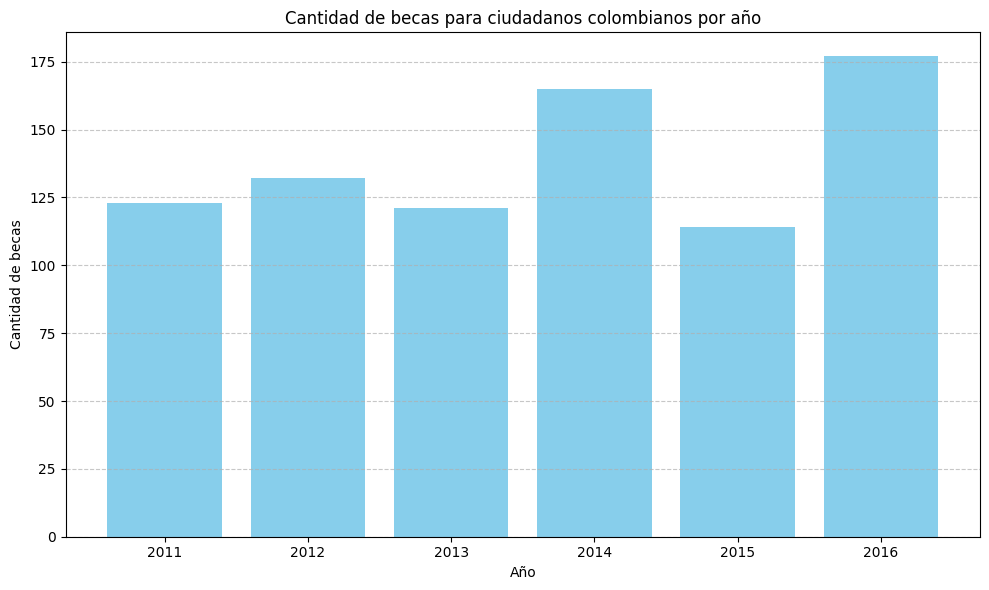

In [ ]:
import matplotlib.pyplot as plt

becas_pd = becas_agrupadas_ordenadas.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(becas_pd["año"], becas_pd["cantidad_becas"], color='skyblue')
plt.title("Cantidad de becas para ciudadanos colombianos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de becas")
plt.xticks(becas_pd["año"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La cantidad de becas ofrecidas para ciudadanos colombianos no muestra una tendencia lineal durante el periodo 2011–2016. Sin embargo, sí se observa un incremento significativo en 2014 y especialmente en 2016, año en el que se registra el mayor número de becas (177).

Aunque hubo caídas notables en 2013 y 2015, el valor final en 2016 supera ampliamente al valor inicial en 2011, lo que permite concluir que, en términos generales, ha habido un incremento en la cantidad de becas ofrecidas a lo largo de los años, pese a algunas fluctuaciones intermedias.

##**C) Paises que han ofrecido becas**

Presente un listado con todos los países (diferentes de Colombia) de los que se tiene reporte que han ofrecido becas para estudiantes colombianos (*solamente presentar nombres de países, y estos solo deben aparecer una única vez en la lista*)

Presente aquí el código desarrollado y el resultado obtenido

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, lower, upper, when

spark = SparkSession.builder.appName("LimpiezaDatos").getOrCreate()

df_con_parens = data.filter(col("Nombre del País").rlike(r"\("))
df_con_parens = df_con_parens.withColumn("Nombre del País", regexp_replace(col("Nombre del País"), r"\s*\([^)]*\)", ""))

def reemplazar_plataforma(data):
    for col_name in data.columns:
        data = data.withColumn(
            col_name,
            when(lower(col(col_name)).contains("plataforma de educación a distancia"),
                 "PLATAFORMA DE EDUCACIÓN A DISTANCIA").otherwise(col(col_name))
        )
    return data

df_con_parens = reemplazar_plataforma(df_con_parens)

df_sin_parens = data.filter(~col("Nombre del País").rlike(r"\("))
df_sin_parens = df_sin_parens.withColumn("Nombre del País", when(~col("Nombre del País").rlike(r"\("), "Diferentes Países").otherwise(col("Nombre del País")))

df_final = df_con_parens.unionByName(df_sin_parens)

df_no_colombia = df_final.filter(
    ~(col("Nombre del País").isin("Colombia", "PLATAFORMA DE EDUCACIÓN A DISTANCIA"))
)

df_no_colombia.show(truncate=False)

+-------------------+-----------------------------------------+----------------------------+-----------------------------------------------------------------------------------------------+---------------+---------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
num_filas = df_no_colombia.count()
num_columnas = len(df_no_colombia.columns)
print(f"Shape: ({num_filas}, {num_columnas})")

Shape: (1454, 8)


In [ ]:
df_no_colombia.select("Nombre del País") \
    .distinct() \
    .orderBy("Nombre del País") \
    .show(truncate=False, n=1000)

+-----------------+
|Nombre del País  |
+-----------------+
|Argentina        |
|Australia        |
|Belice           |
|Brasil           |
|Brunéi           |
|Bélgica          |
|Canadá           |
|Checa Rep.       |
|Chile            |
|China            |
|Corea del Sur    |
|Costa Rica       |
|Diferentes Países|
|Ecuador          |
|Egipto           |
|España           |
|Estados Unidos   |
|Francia          |
|Honduras         |
|Hungría          |
|India            |
|Indonesia        |
|Israel           |
|Italia           |
|Japón            |
|Malasia          |
|México           |
|Nicaragua        |
|Nueva Zelanda    |
|Panamá           |
|Paraguay         |
|Perú             |
|Polonia          |
|Puerto Rico      |
|Reino Unido      |
|Rusia            |
|Singapur         |
|Suecia           |
|Suiza            |
|Tailandia        |
|Taiwán           |
|Trinidad y Tobago|
|Turquía          |
|Uruguay          |
+-----------------+



##**D) Áreas del conocimiento y Posgrados**

Se desea averiguar cúal es el área de conocimiento predominante por país. Además, queremos conocer qué porcentaje de los programas ofrecidos (**de acuerdo al nombre del programa**) corresponden a estudios de posgrado.

Presente aquí el código desarrollado y el resultado obtenido

In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import col, count, row_number

conteo_area_pais = df_no_colombia.groupBy("Nombre del País", "Area del Conocimiento") \
    .agg(count("*").alias("conteo"))

window_pais = Window.partitionBy("Nombre del País").orderBy(col("conteo").desc())

area_predominante = conteo_area_pais.withColumn("rank", row_number().over(window_pais)) \
    .filter(col("rank") == 1) \
    .select("Nombre del País", "Area del Conocimiento", "conteo")

print("El área de conocimiento predominante por país se presenta en el siguiente DataFrame")
area_predominante.show(truncate=False, n=1000)


El área de conocimiento predominante por país se presenta en el siguiente DataFrame
+-----------------+------------------------------------------+------+
|Nombre del País  |Area del Conocimiento                     |conteo|
+-----------------+------------------------------------------+------+
|Argentina        |ADMINISTRACIÓN                            |19    |
|Australia        |MAESTRÍAS EN DIFERENTES ÁREAS             |3     |
|Belice           |HUMANIDADES                               |2     |
|Brasil           |PREGRADO EN DIFERENTES AREAS              |6     |
|Brunéi           |MAESTRÍAS Y DOCTORADOS EN DIFERENTES ÁREAS|1     |
|Bélgica          |INGENIERIA Y AFINES                       |4     |
|Canadá           |MAESTRÍAS Y DOCTORADOS EN DIFERENTES ÁREAS|7     |
|Checa Rep.       |HUMANIDADES                               |5     |
|Chile            |DIFERENTES AREAS                          |15    |
|China            |POSGRADO DIFERENTES AREAS                 |7     |
|Corea

In [ ]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf, col

palabras_posgrado = ["maestría","maestrias","maestria","master","master's",
                     "posgrado", "postgrado","post graduated",
                     "especialización", "especializaciones", "especializaciones",
                      "doctorado", "postdoctorado"]

def es_posgrado(nombre_programa):
    if nombre_programa is None:
        return 0
    nombre_lower = nombre_programa.lower()
    for palabra in palabras_posgrado:
        if palabra in nombre_lower:
            return 1
    return 0

es_posgrado_udf = udf(es_posgrado, IntegerType())
spark.udf.register("esPosgrado", es_posgrado_udf)

df_no_colombia.createOrReplaceTempView("programas")

query = """
SELECT
  COUNT(*) AS total_programas,
  SUM(CASE WHEN esPosgrado(`Nombre del programa`) = 1 THEN 1 ELSE 0 END) AS total_posgrados
FROM programas
"""

resultado = spark.sql(query).collect()[0]

total_programas = resultado['total_programas']
total_posgrados = resultado['total_posgrados']
porcentaje_posgrado = (total_posgrados / total_programas * 100) if total_programas > 0 else 0

print(f"\n El porcentaje de programas de posgrado por nombre del programa es de: {porcentaje_posgrado:.2f}%")



 El porcentaje de programas de posgrado por nombre del programa es de: 27.65%


##**E) ¿Qué podemos concluir a partir del Perfil del Aspirante y el Objetivo del Programa?**

Se dispone de dos campos de descripción, que no emplean un formato claro que permita analizar los perfiles de los aspirantes con respecto al objetivo del programa.

Plantee una forma de analizar esta información para conocer las relaciones entre los perfiles y lo objetivos.

Presente aquí el código desarrollado y el resultado obtenido

<ipython-input-39-2098333621>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_freq, x="count", y="bigram", palette="mako")


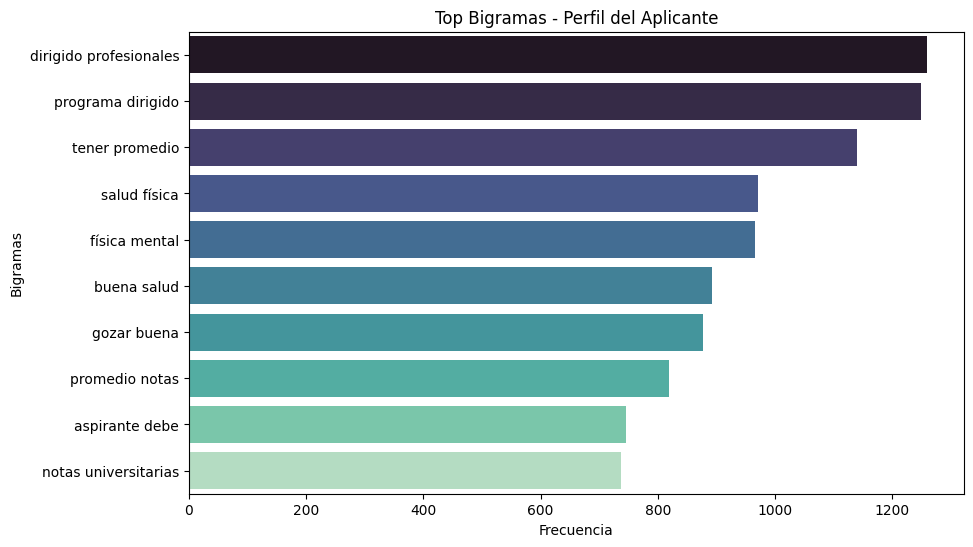

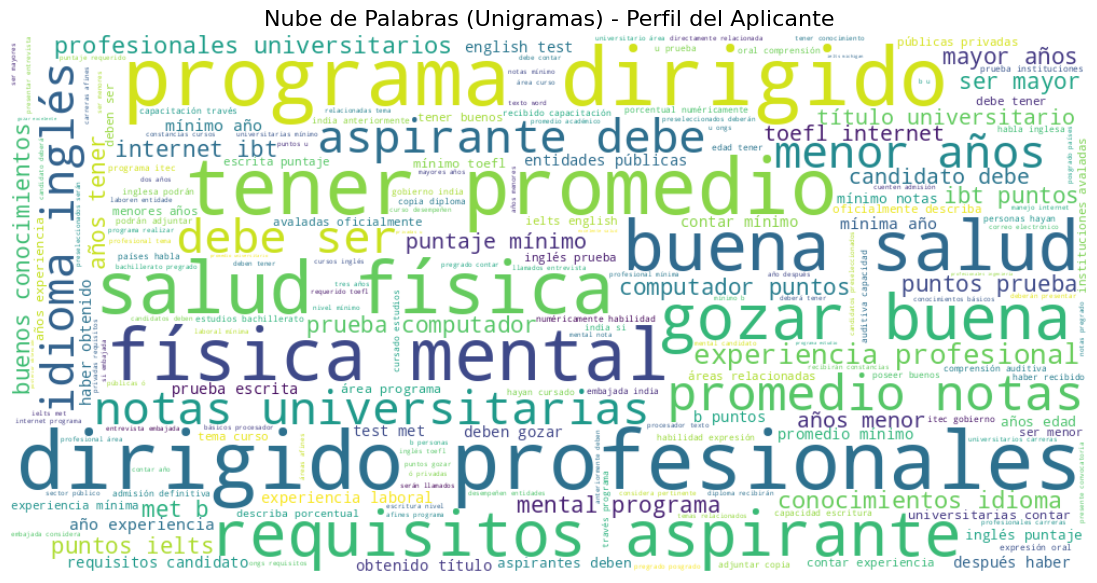

<ipython-input-39-2098333621>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_freq, x="count", y="bigram", palette="mako")


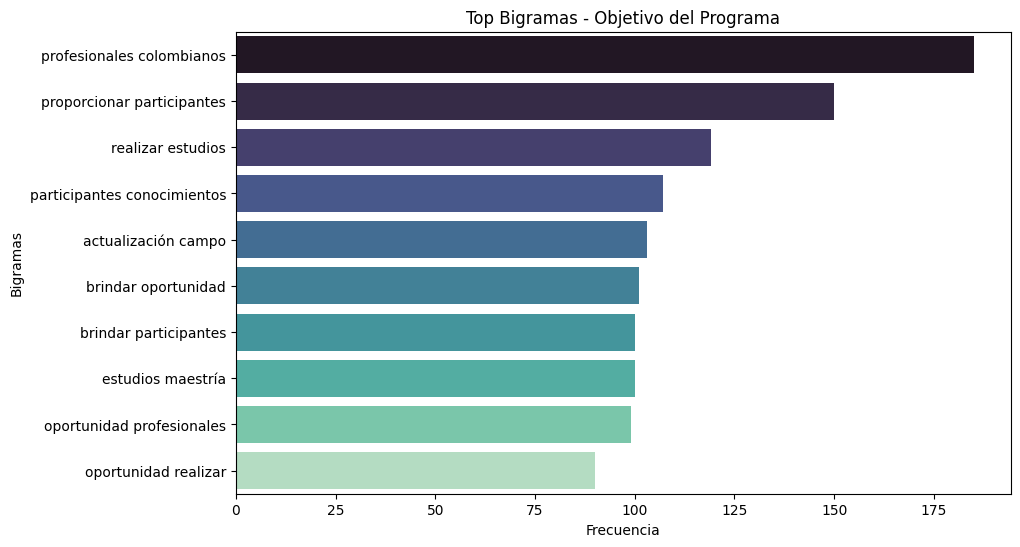

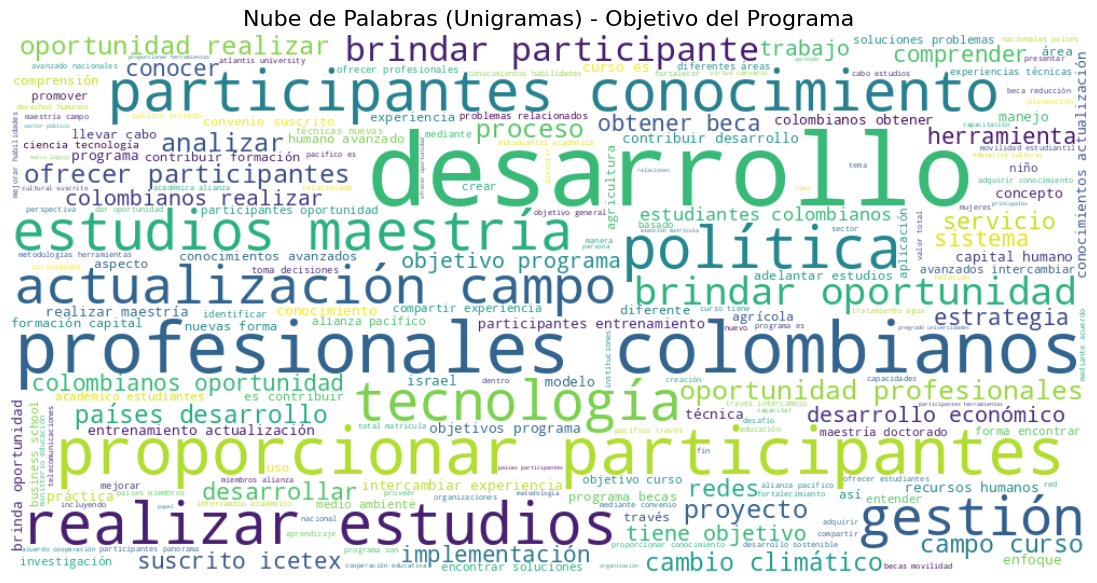

In [ ]:
from pyspark.sql.functions import col, lower, regexp_replace
from pyspark.ml.feature import Tokenizer, StopWordsRemover
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
from itertools import tee

stopwords_es = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para",
    "con", "no", "una", "su", "al", "lo", "como", "más", "pero", "sus", "le", "ya", "o",
    "este", "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "también",
    "me", "hasta", "hay", "donde", "quien", "desde", "todo", "nos", "durante", "todos",
    "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", "e", "esto",
    "mí", "antes", "algunos", "qué", "unos", "yo", "otro", "otras", "otra", "él", "tanto",
    "esa", "estos", "mucho", "quienes", "nada", "muchos", "cual", "poco", "ella", "estar",
    "estas", "algunas", "algo", "nosotros", "mi", "mis", "tú", "te", "ti", "tu", "tus",
    "ellas", "nosotras", "vosotros", "vosotras", "os", "mío", "mía", "míos", "mías",
    "tuyo", "tuya", "tuyos", "tuyas", "suyo", "suya", "suyos", "suyas", "nuestro",
    "nuestra", "nuestros", "nuestras", "vuestro", "vuestra", "vuestros", "vuestras",
    "esos", "esas", "estoy", "estás", "está", "estamos", "estáis", "están", "esté",
    "estés", "estemos", "estéis", "estén"
]

def generar_bigramas(tokens):
    a, b = tee(tokens)
    next(b, None)
    return [' '.join(pair) for pair in zip(a, b)]

def analizar_columna(df, columna, titulo):
    df_proc = df.withColumn("text", lower(col(columna)))
    df_proc = df_proc.withColumn("text", regexp_replace(col("text"), r"[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]", ""))
    df_proc = df_proc.withColumn("text", regexp_replace(col("text"), r"\s+", " "))

    tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
    df_tokens = tokenizer.transform(df_proc)

    remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens", stopWords=stopwords_es)
    df_filtered = remover.transform(df_tokens)

    tokens_rdd = df_filtered.select("filtered_tokens").rdd.map(lambda row: row["filtered_tokens"]).collect()

    bigramas = []
    for tokens in tokens_rdd:
        bigramas.extend(generar_bigramas(tokens))

    bigram_freq = pd.Series(bigramas).value_counts().head(10).reset_index()
    bigram_freq.columns = ["bigram", "count"]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=bigram_freq, x="count", y="bigram", palette="mako")
    plt.title(f"Top Bigramas - {titulo}")
    plt.xlabel("Frecuencia")
    plt.ylabel("Bigramas")
    plt.show()

    all_tokens = [token for tokens in tokens_rdd for token in tokens]
    unigram_text = ' '.join(all_tokens)
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(unigram_text)

    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de Palabras (Unigramas) - {titulo}", fontsize=16)
    plt.show()

analizar_columna(df_no_colombia, "Perfil del Aplicante", "Perfil del Aplicante")
analizar_columna(df_no_colombia, "Objetivo del Programa", "Objetivo del Programa")

##**Análisis de los resultados**

Teniendo en cuenta los resultados obtenidos en los puntos anteriores, presente sus impresiones sobre las becas académicas disponibles para los estudiantes colombianos.


#Conclusiones
El programa de becas tiene como objetivo principal fortalecer las capacidades de los profesionales colombianos, brindándoles la oportunidad de realizar estudios de maestría en el exterior. Este enfoque se evidencia en los bigramas más frecuentes como “profesionales colombianos”, “realizar estudios” y “brindar oportunidad”. Además, el perfil del aplicante se centra en individuos con un buen promedio académico y en buen estado de salud física y mental, lo cual garantiza que los seleccionados puedan aprovechar al máximo las oportunidades ofrecidas.

Entre los años 2011 y 2016, se observa una tendencia creciente en la asignación de becas, alcanzando su punto más alto en 2016. Este comportamiento sugiere un fortalecimiento del programa a lo largo del tiempo y un mayor acceso para los ciudadanos colombianos. En cuanto a las áreas de conocimiento, se evidencia una distribución estratégica por país: por ejemplo, India y Estados Unidos destacan en ingeniería, Egipto en ciencias agropecuarias, e Israel en educación. Esto indica una alineación entre las fortalezas académicas de los países anfitriones y las prioridades de formación para Colombia.

#**Notas:**

* Analice los resultados de cada punto y presente sus conclusiones
* Utilice al menos una vez cada uno de los siguientes métodos

  *   agg - YA
  *   withColumn - YA
  *   groupBy - YA
  *   sql - YA
  *   registerFunction - YA